In [12]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pickle
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

## Q3: Policy Gradients

In [84]:
def gen_plot(file_prefix, file_end, plot_title, metric='Eval_AverageReturn', data_folder="run_logs", ignore_tokens=[], debug=False):
    files = glob.glob(f"{data_folder}/{file_prefix}*")
    if debug:
        print(files)
    
    plt.figure()
    experiments = set()
    for file in files:
        if any([val in file for val in ignore_tokens]):
            continue
        event_acc = EventAccumulator(file)
        event_acc.Reload()

        if debug:
            print(event_acc.Tags())

        env_steps = [event.value for event in event_acc.Scalars('Train_EnvstepsSoFar')]
        vals = [event.value for event in event_acc.Scalars(metric)]

        lbl = file.split(data_folder + "/")[1].split(file_end)[0]
        if lbl in experiments:
            continue
        experiments.add(lbl)
        plt.plot(env_steps, np.array(vals), label=lbl)
        plt.legend()
        plt.title(plot_title)
    plt.xlabel('Number of Environment Steps')
    plt.ylabel(metric.replace("_", " "))
    plt.show()

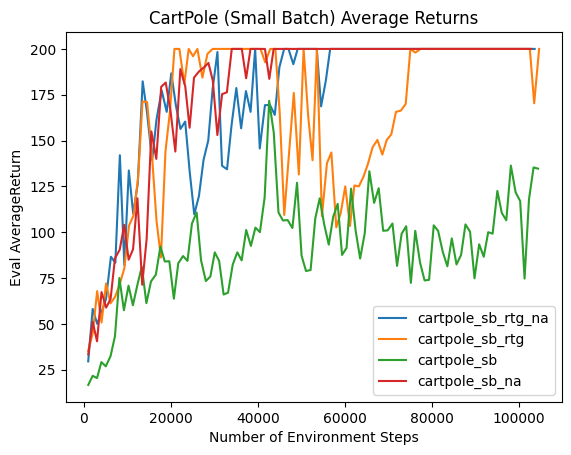

In [89]:
gen_plot(file_prefix="cartpole_sb", 
         file_end="_CartPole",
         plot_title="CartPole (Small Batch) Average Returns")

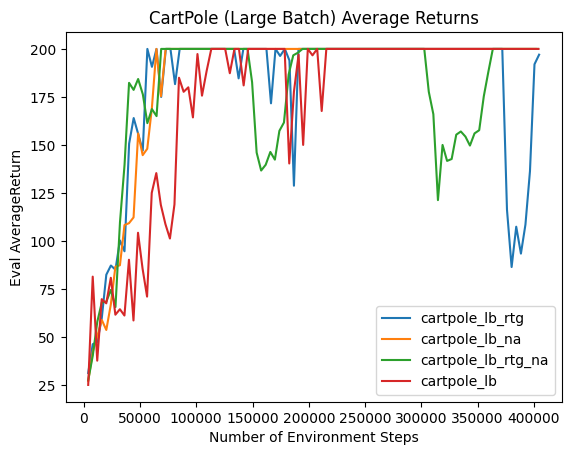

In [90]:
gen_plot(file_prefix="cartpole_lb", 
         file_end="_CartPole",
         plot_title="CartPole (Large Batch) Average Returns")

## Q4: Using a Neural Network Baseline

['run_logs/cheetah_baseline_decreased_bgs_HalfCheetah-v4_25-09-2023_02-10-42', 'run_logs/cheetah_baseline_na_HalfCheetah-v4_25-09-2023_01-53-23', 'run_logs/cheetah_baseline_decreased_lr_HalfCheetah-v4_25-09-2023_02-29-07', 'run_logs/cheetah_HalfCheetah-v4_25-09-2023_01-28-22', 'run_logs/cheetah_baseline_HalfCheetah-v4_25-09-2023_01-41-07']
{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Eval_AverageReturn', 'Eval_StdReturn', 'Eval_MaxReturn', 'Eval_MinReturn', 'Eval_AverageEpLen', 'Train_AverageReturn', 'Train_StdReturn', 'Train_MaxReturn', 'Train_MinReturn', 'Train_AverageEpLen', 'Actor_Loss', 'Train_EnvstepsSoFar', 'TimeSinceStart', 'Initial_DataCollection_AverageReturn'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}
{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Eval_AverageReturn', 'Eval_StdReturn', 'Eval_MaxReturn', 'Eval_MinReturn', 'Eval_AverageEpLen', 'Train_AverageReturn', 'Train_StdReturn', 'Train_MaxRetur

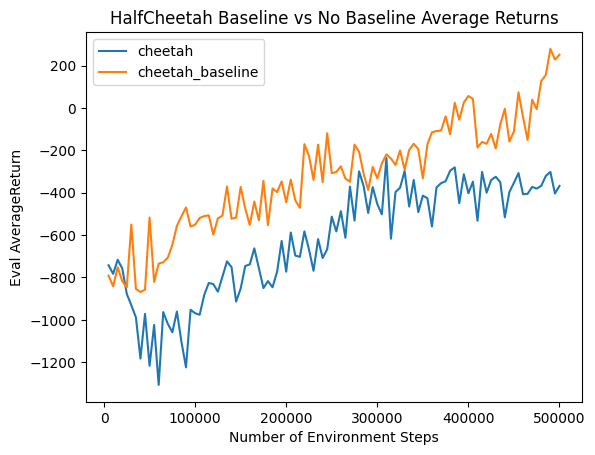

In [94]:
gen_plot(file_prefix="cheetah",
         file_end="_HalfCheetah",
         plot_title="HalfCheetah Baseline vs No Baseline Average Returns",
         ignore_tokens=["_na_", "_decreased"],
         debug=True)

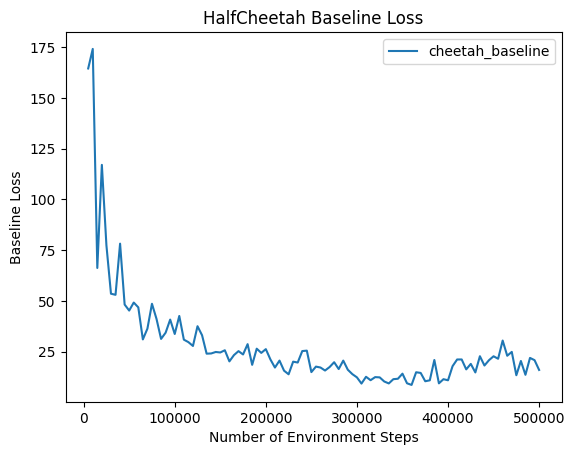

In [96]:
gen_plot(file_prefix="cheetah_baseline",
         file_end="_HalfCheetah",
         plot_title="HalfCheetah Baseline Loss",
         metric="Baseline_Loss",
         ignore_tokens=["_na_", "_decreased"])

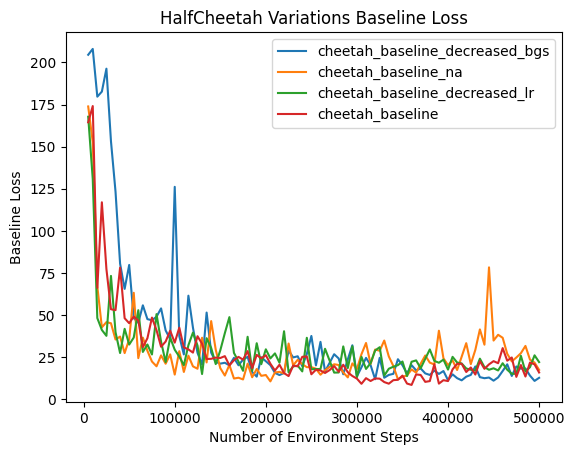

In [102]:
gen_plot(file_prefix="cheetah_baseline",
         file_end="_HalfCheetah",
         plot_title="HalfCheetah Variations Baseline Loss",
         metric="Baseline_Loss")

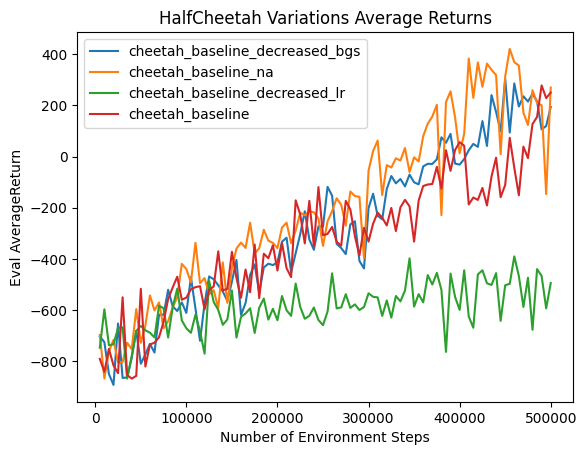

In [103]:
gen_plot(file_prefix="cheetah_baseline",
         file_end="_HalfCheetah",
         plot_title="HalfCheetah Variations Average Returns")

## Q5: Implementing Generalized Advantage Estimation

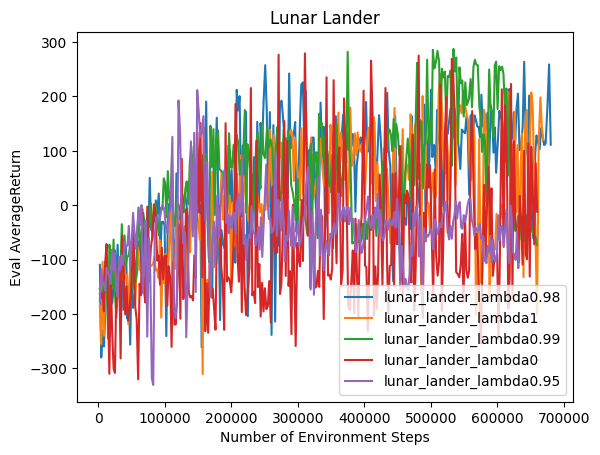

In [60]:
gen_plot(file_prefix="lunar",
         file_end="_Lunar",
         plot_title="Lunar Lander")

## Q6: Hyperparameters and Sample Efficiency

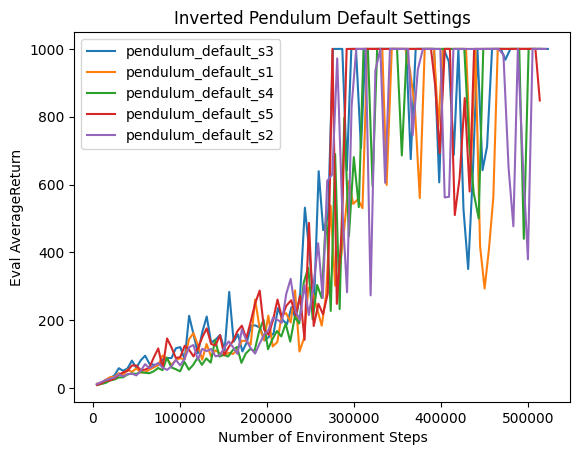

In [69]:
gen_plot(file_prefix="pendulum_default",
        file_end="_InvertedPendulum",
        plot_title="Inverted Pendulum Default Settings")

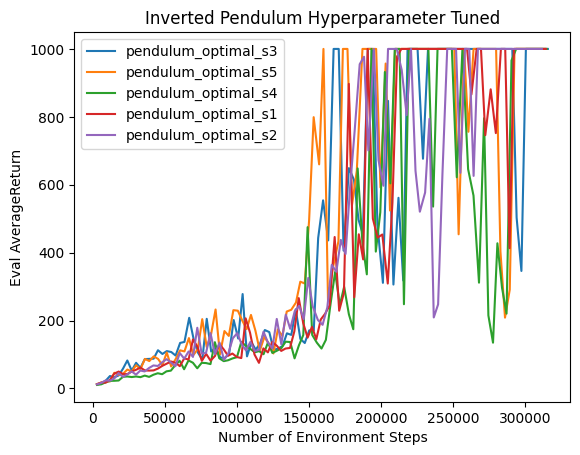

In [70]:
gen_plot(file_prefix="pendulum_optimal",
         file_end="_InvertedPendulum",
         plot_title="Inverted Pendulum Hyperparameter Tuned")

[]


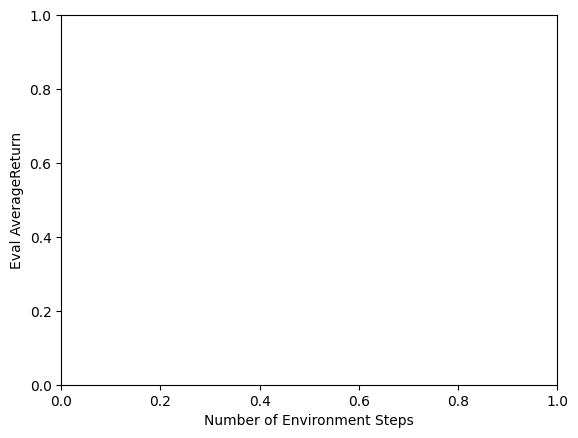

In [71]:
gen_plot(file_prefix="pendulum",
         file_end="_InvertedPendulum",
         plot_title="Inverted Pendulum Hyperparameter Tuned",
         data_folder="data",
         debug=True)

## Q7. Humanoid

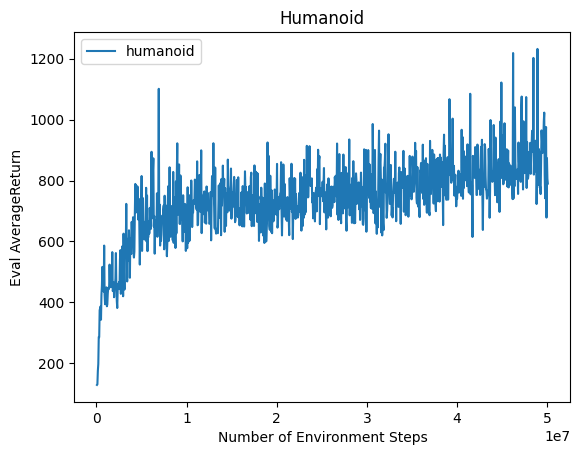

In [73]:
gen_plot(file_prefix="humanoid",
         file_end="_stripped",
         plot_title="Humanoid")

## Q8.3(b)

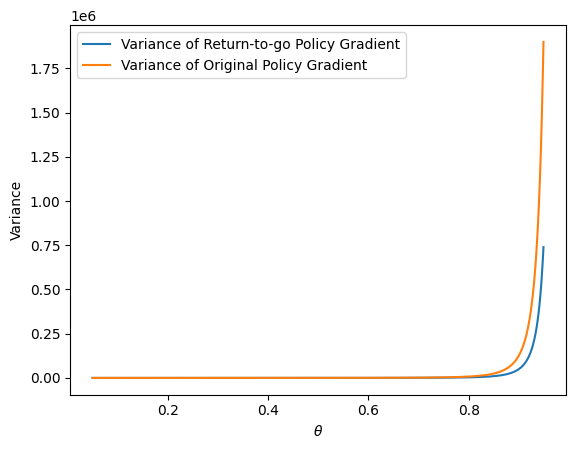

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.05, 0.95, 0.001)
def rtg(x):
    return (x + 3 + 1/x) / (1 - x)**4
def orig(x):
    return (4*x + 8 + 1/x) / (1 - x)**4
plt.plot(x, rtg(x), label="Variance of Return-to-go Policy Gradient")
plt.plot(x, orig(x), label="Variance of Original Policy Gradient")
plt.ylabel("Variance")
plt.xlabel("$\\theta$")
plt.legend()